**Import Necessary Libraries**

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

**Read the DATA and check for missing Values**

In [3]:
df=pd.read_csv("A1.csv")

In [4]:
df.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
df.isna().sum()

 number of claims                                                  0
total payment for all the claims in thousands of Swedish Kronor    0
dtype: int64

**Description of the Data**

In [6]:
df.describe()

,number of claims,total payment for all the claims in thousands of Swedish Kronor
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [7]:
df.shape    #Shape of the DataFrame

(63, 2)

In [8]:
df.columns  #Column names 

Index([' number of claims', 'total payment for all the claims in thousands of Swedish Kronor'], dtype='object')

**Data Vizualisations**

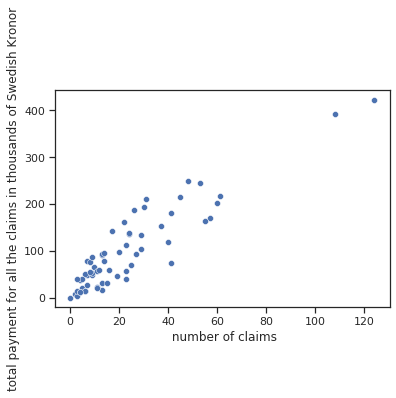

In [9]:
sns.set(style="ticks")
f = sns.scatterplot(x=" number of claims", y="total payment for all the claims in thousands of Swedish Kronor", data=df, palette="bwr")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1629: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



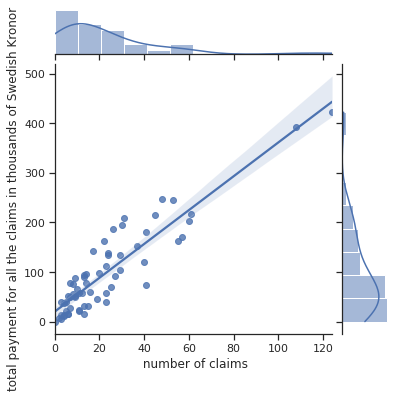

In [10]:
sns.jointplot(x=" number of claims", y="total payment for all the claims in thousands of Swedish Kronor", data=df, kind='reg')

**Checking for the Outliers**

Removing them using np.sqrt() because log() can't be dont because of zero values

*BOX PLOTS*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



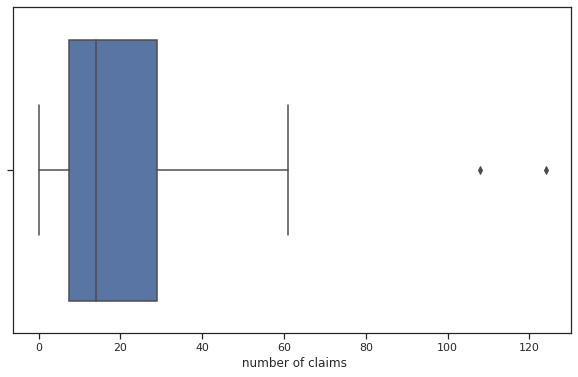

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot((df[" number of claims"]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



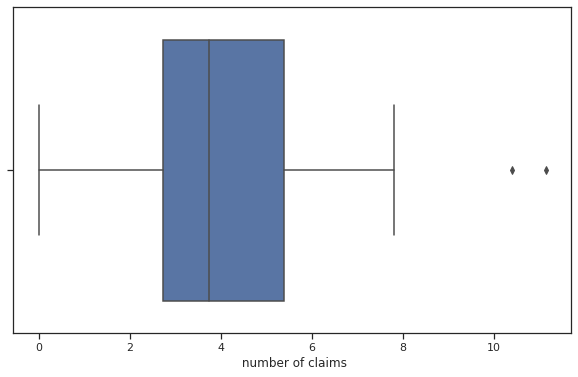

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(np.sqrt(df[" number of claims"]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



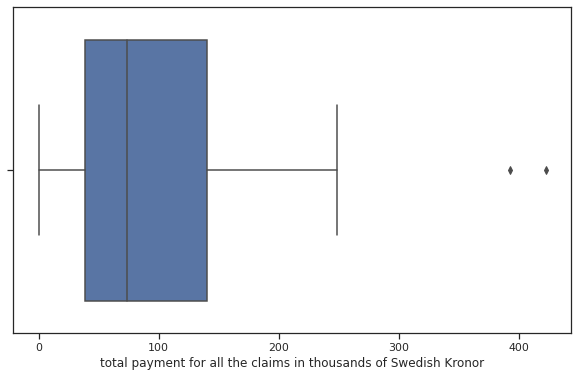

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot((df["total payment for all the claims in thousands of Swedish Kronor"]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



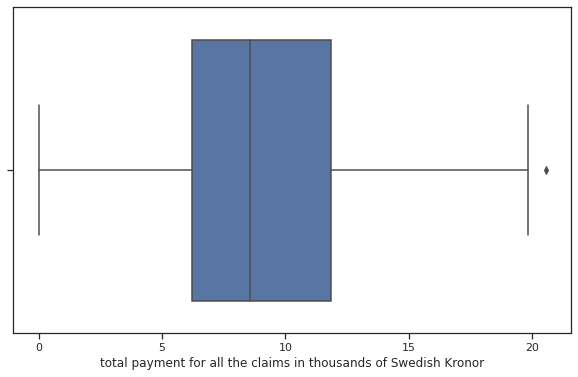

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(np.sqrt(df["total payment for all the claims in thousands of Swedish Kronor"]))

**Creating new columns with the SQUARE ROOTED values of each column above**

In [16]:
df['num_claims']=np.sqrt(df[' number of claims'])
df['payments']=np.sqrt(df['total payment for all the claims in thousands of Swedish Kronor'])

In [17]:
df.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor,num_claims,payments
0,108,392.5,10.392305,19.811613
1,19,46.2,4.358899,6.797058
2,13,15.7,3.605551,3.962323
3,124,422.2,11.135529,20.547506
4,40,119.4,6.324555,10.927031


**Extracting Features---> X and Target---->y**

In [18]:
X = df.iloc[:, 2].values  #New Feature
y = df.iloc[:, 3].values  #New Target

In [19]:
X=X.reshape(-1,1)     #Reshaping 
y=y.reshape(-1,1)

**Applying MinMaxScaling**

In [20]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

In [21]:
X[:5]

array([[0.93325653],
       [0.39144068],
       [0.32378806],
       [1.        ],
       [0.56796183]])

**Splitting the Data into Train and Test**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)


In [24]:
X_train.shape

(47, 1)

**Model Building**

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting the Test set results
Y_Pred = regressor.predict(X_test)

**Evaluating the Model**

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Mean Square Error',mean_squared_error(Y_Pred,y_test))

Mean Square Error 0.0073626486112859805


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Mean Absolute Error',mean_absolute_error(Y_Pred,y_test))

Mean Absolute Error 0.06659877653408068


In [28]:
print('Co-efficient of linear regression',regressor.coef_)

Co-efficient of linear regression [[0.96419694]]


In [29]:
print('Intercept of linear regression model',regressor.intercept_)

Intercept of linear regression model [0.0785742]


In [30]:
from sklearn import metrics
print('Model R^2 Square value', metrics.r2_score(y_test,Y_Pred))

Model R^2 Square value 0.8273913944609286


**Error Terms**

Text(0.5, 1.0, 'Linear Regression')

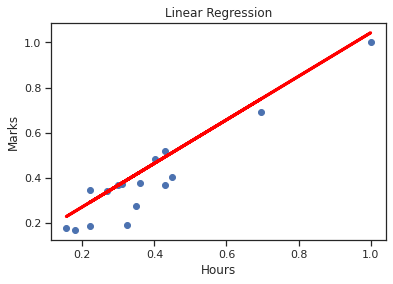

In [31]:
#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_Pred, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

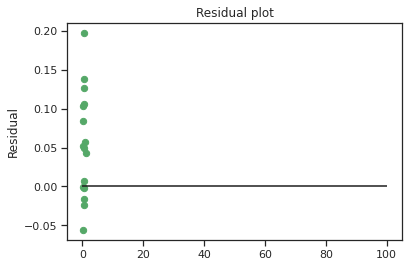

In [32]:
#Residual plot is such because of MIN MAX Scaling ; thus every value came into range (0-1)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

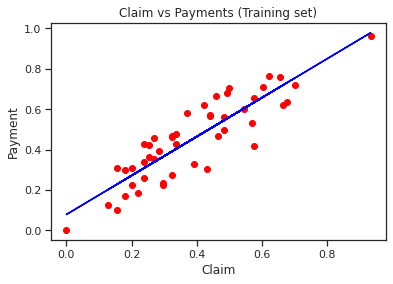

In [33]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Claim vs Payments (Training set)')
plt.xlabel('Claim')
plt.ylabel('Payment')
plt.show()


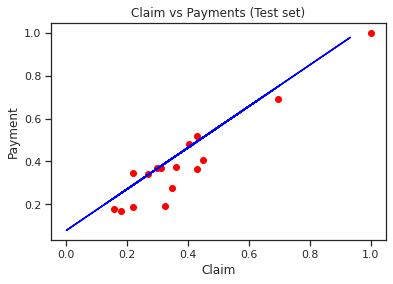

In [34]:

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Claim vs Payments (Test set)')
plt.xlabel('Claim')
plt.ylabel('Payment')
plt.show()